In [181]:
import pandas as pd
import numpy as np
from scipy import integrate
import seaborn as sns
import matplotlib.pyplot as mp
import plotly.offline as pyo
import plotly.graph_objs as go;
import pandas_datareader as datareader
import datetime as dt
import math
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')


### Problem Statement 4:
 You are provided with the '50_Startups' data. Using the given features, you must predict the profit of these startups.
 Dataset Description:
 
I.R&D Spend: Expenditures in Research and Development
 
II.Administration: Expenditures in Administration
 
III.Marketing Spend: Expenditures in Marketing
 
IV.State: In which state the company belongs to
 
V.Profit: The profit made by the company
 
Write a Python code to perform the following tasks mentioned:
 
1.Load the data, check its shape and check for null values
 
2.Convert categorical features to numerical values using Label Encoder
 
3.Split the dataset for training and testing 
 
 4.Train the model using sklearn(linear regression), also find the intercept and coefficient from the trained model
 
5.Predict the profits of test data and evaluate the model using r2 score and mean squared error

6.Regularize the model using Ridge Regression and find the Score 
  
7.Regularize the model using LassoRegression and find the Score

In [182]:
data=pd.read_csv("D:\Shivam\study material\CSV\\50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [184]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [185]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

dataset has no null values

In [186]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## Outliers detection

<AxesSubplot: xlabel='Marketing Spend'>

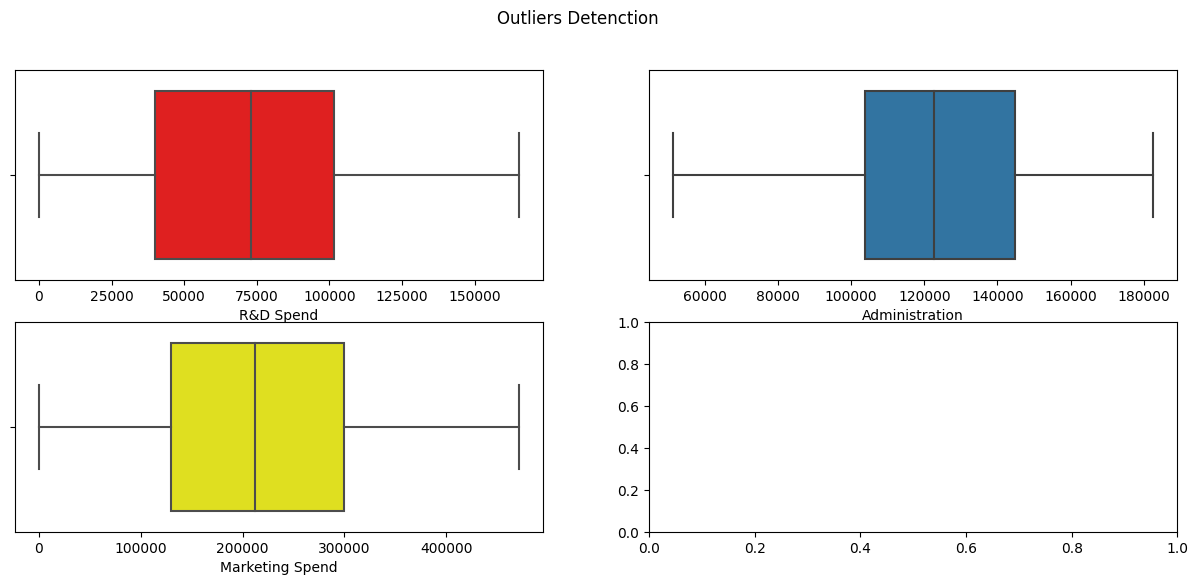

In [187]:
fig,axs=mp.subplots(2,2,figsize=(15,6))
fig.suptitle("Outliers Detenction")
sns.boxplot(ax=axs[0,0],x=data['R&D Spend'],color='red')
sns.boxplot(ax=axs[0,1],x=data['Administration'])
sns.boxplot(ax=axs[1,0],x=data['Marketing Spend'],color='yellow')


### No outliers present

Lets handle our categorucal data

In [188]:
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

#### Total 3 unique values, let us encode it for our model to understand this variables better

In [189]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [190]:
lr.fit(data['State'])

LabelEncoder()

In [191]:
lr.classes_### will give us the insight of how our categorical values are encoded

array(['California', 'Florida', 'New York'], dtype=object)

In [192]:
lr.inverse_transform([1,2,2,2,2])### we can check the encoded values using the inverse_transform comand and it will give us back the decoded values

array(['Florida', 'New York', 'New York', 'New York', 'New York'],
      dtype=object)

In [193]:
enco=lr.fit_transform(data['State'])### transforming the dataset

In [194]:
enco### so our labelencoder gives california 0, florida 1and new york 2 encoded value

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

In [195]:
data['State']=pd.DataFrame(enco)### addding the encoded values back to our dataset

In [196]:
data.head()### new dataset


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


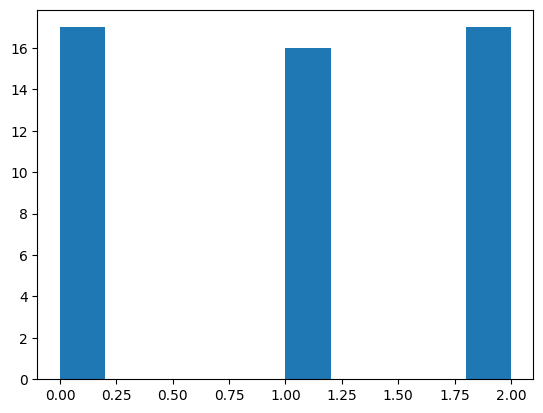

In [197]:
mp.hist(data['State'])
mp.show()

### let us split the dataset and train our linear model

In [198]:
x=data.drop('Profit',axis=1)
y=data['Profit']

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [200]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=40)

xtrain.shape,xtest.shape

((40, 4), (10, 4))

#### 40 rows for training and 10 rows for test with indenpendent variables 4

In [201]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [202]:
ypred=model.predict(xtest)

In [217]:
print("R2 score",r2_score(ytest,ypred))
print("Mean squared error",mean_squared_error(ytest,ypred))


R2 score 0.9297799683001606
Mean squared error 207035439.72512016


In [218]:
model.score(xtrain,ytrain)

0.9594346679979907

In [219]:
model.intercept_,model.coef_

(49357.79933082023,
 array([ 7.88404893e-01,  2.84815209e-03,  2.73667869e-02, -1.78676407e+03]))

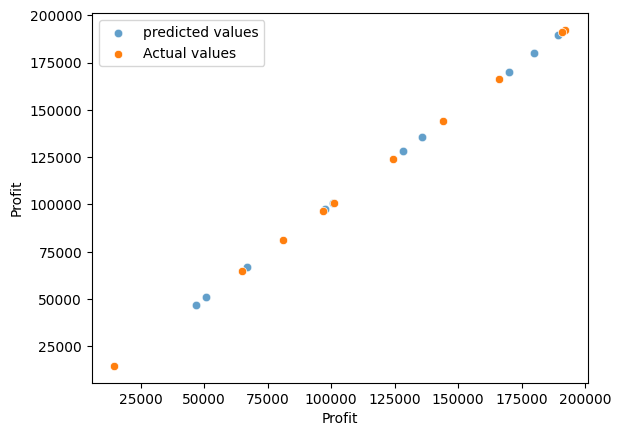

In [203]:
sns.scatterplot(x=ypred,y=ypred,label='predicted values',alpha=0.7)
sns.scatterplot(x=ytest,y=ytest,label='Actual values')
mp.legend()
mp.show()


#### High error as our data is not scaled and not droping less correlated variables to train

### Ridge regression model

In [206]:
from sklearn.linear_model import Ridge
ride=Ridge(alpha=10)
ride.fit(xtrain,ytrain)
ridgepredict=ride.predict(xtest)

In [207]:
print("R2 score",r2_score(ytest,ridgepredict))
print("Mean squared error",mean_squared_error(ytest,ridgepredict))


R2 score 0.9315668537650141
Mean squared error 201767019.74582213


In [220]:
ride.intercept_,ride.coef_

(48891.212699002645,
 array([ 7.86772933e-01,  3.78976753e-03,  2.74263053e-02, -1.30746070e+03]))

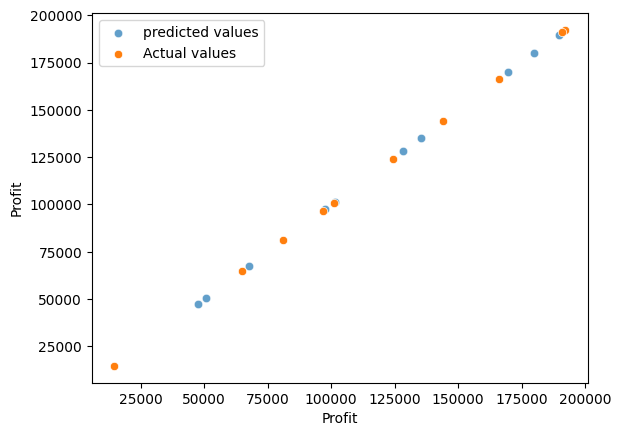

In [208]:
sns.scatterplot(x=ridgepredict,y=ridgepredict,label='predicted values',alpha=0.7)
sns.scatterplot(x=ytest,y=ytest,label='Actual values')
mp.legend()
mp.show()


#### Model score on training and test data

In [209]:
ride.score(xtrain,ytrain),ride.score(xtest,ytest)


(0.9593086323935838, 0.9315668537650141)

#### Lasso regression model

In [210]:
from sklearn.linear_model import Lasso
lassomodel=Lasso(alpha=10)
lassomodel.fit(xtrain,ytrain)
lassopredict=lassomodel.predict(xtest)

In [214]:
print("R2 score",r2_score(ytest,lassopredict))
print("Mean squared error",mean_squared_error(ytest,lassopredict))


R2 score 0.9298361613281556
Mean squared error 206869761.24308592


In [222]:
lassomodel.score(xtrain,ytrain),lassomodel.score(xtest,ytest)


(0.9594345500327643, 0.9298361613281556)

In [223]:
lassomodel.intercept_,lassomodel.coef_

(49343.52672524193,
 array([ 7.88354974e-01,  2.87694313e-03,  2.73686053e-02, -1.77210046e+03]))

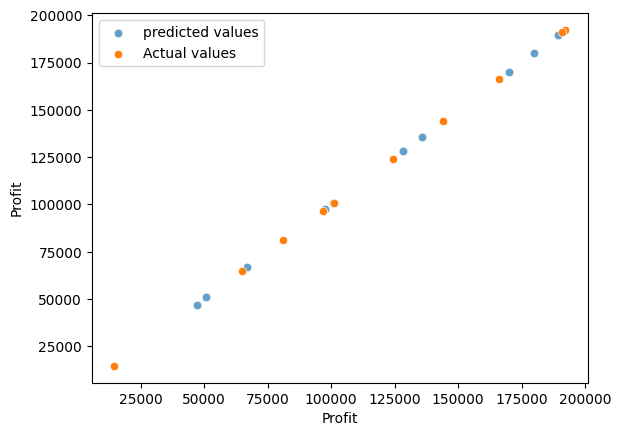

In [224]:
sns.scatterplot(x=lassopredict,y=lassopredict,label='predicted values',alpha=0.7)
sns.scatterplot(x=ytest,y=ytest,label='Actual values')
mp.legend()
mp.show()
